１．　What is TF Config, how to set it up in a cluster environment?

### TF.gfile

Used for File I/O wrappers without thread locking

In [2]:
import tensorflow as tf

/home/karen/anaconda3/envs/develop/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/karen/anaconda3/envs/develop/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/karen/anaconda3/envs/develop/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### How to resize an axis, (fill with maximum)

In [3]:
def resize_axis(tensor, axis, new_size, fill_value=0):
    tensor = tf.convert_to_tensor(tensor)
    shape = tf.unstack(tf.shape(tensor))
    
    pad_shape = shape[:]
    pad_shape[axis] = tf.maximum(0, new_size-shape[axis])
    
    shape[axis] = tf.minimum(shape[axis], new_size)
    shape = tf.stack(shape)
    
    resized = tf.concat([
        tf.slice(tensor, tf.zeros_like(shape), shape),
        tf.fill(tf.stack(pad_shape), tf.cast(fill_value, tensor.dtype))
    ], axis)
    
    new_shape = tensor.get_shape().as_list()  # A copy is being made.
    new_shape[axis] = new_size
    resized.set_shape(new_shape)
    
    return resized

### Implement reshape_like

In [4]:
def reshape_like(a, b):
    """Reshapes a to match the shape of b in all but the last dimension"
    """
    shape_b = tf.shape(b)[:-1]
    shape_a = tf.shape(a)[-1:]
    
    return tf.reshape(a, tf.concat([shape_b, shape_a], 0))

In [2]:
l = [0,1,2,3,4]
print(l[:-1])

[0, 1, 2, 3]


### Tensorflow Slim

In [5]:
slim = tf.contrib.slim

/home/karen/anaconda3/envs/develop/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/karen/anaconda3/envs/develop/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [7]:
@slim.add_arg_scope
def fn(a, b, c=3):
    d = c + b
    print("a={}, b={} \n".format(a,b))
    return d

with slim.arg_scope([fn], a=1):
    print(fn(b=2))

a=1, b=2 

5


In [8]:
tf.Assert

<function tensorflow.python.ops.control_flow_ops.should_use_result.<locals>.wrapped(condition, data, summarize=None, name=None)>

#### Meshgrid

/home/karen/anaconda3/envs/develop/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


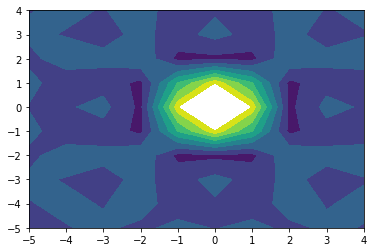

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 1)
y = np.arange(-5, 5, 1)
xx, yy = np.meshgrid(x, y, sparse=False)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)
plt.show()

In [17]:
print(x)
print(y)

[-5 -4 -3 -2 -1  0  1  2  3  4]
[-5 -4 -3 -2 -1  0  1  2  3  4]


In [18]:
print(xx)
print(yy)

[[-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]]
[[-5 -5 -5 -5 -5 -5 -5 -5 -5 -5]
 [-4 -4 -4 -4 -4 -4 -4 -4 -4 -4]
 [-3 -3 -3 -3 -3 -3 -3 -3 -3 -3]
 [-2 -2 -2 -2 -2 -2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3  3  3  3]
 [ 4  4  4  4  4  4  4  4  4  4]]
